In [2]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from scipy.optimize import curve_fit
%matplotlib inline

Part 1: Energy Determination

In [3]:
theta = np.array(np.arange(20,90,5))
E_comp = np.array([598.30,577.71,551.34,524.16,500.10,470.70,448.67,421.94,397.18,372.26,353.49,331.73,312.98,296.82])
sumUnderPeak = np.array([32230,17463,10456,10208,11041,10260,10413,10305,10361,10274,10542,10298,12660,10997])
sumUnderPeakErr = np.array([581,539,809,542,454,445,477,464,562,433,742,474,601,480])
collecTime = np.array([242.12,164.94,203.80,145.74,162.20,167.10,195.66,204.36,275.96,238.46,452.64,280.34,421.82,324.86])

thetaRad = np.cos(np.deg2rad(theta))
x = 1 - thetaRad
y = 1/(E_comp*1E-3)

In [4]:
def inverseE(E_comp):
    return 1 / (1.51 + 1.956 * (1 - thetaRad))

In [5]:
# Least squares fit line
def fitfunc(x,m,c): 
    return m*x+c

# Plot line of best fit
pars1,cov1 = curve_fit(fitfunc,x,y)
pars2,cov2 = curve_fit(fitfunc,x,1/inverseE(E_comp))

In [6]:
# Errors on slopes and intercepts
m1=pars1[0]
σm1=np.sqrt(cov1[0][0])
b1=pars1[1]
σb1=np.sqrt(cov1[1][1])

m2=pars2[0]
σm2=np.sqrt(cov2[0][0])
b2=pars2[1]
σb2=np.sqrt(cov2[1][1])

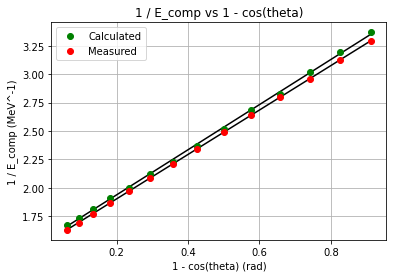

Measured: Slope = 1.99 ± 0.01, Intercept = 1.54 ± 0.01
Calculated: Slope = 1.96 ± 0.00, Intercept = 1.51 ± 0.00


In [7]:
plt.plot(x,fitfunc(x,*pars1),'black')
plt.plot(x,fitfunc(x,*pars2),'black')
plt.plot(x,y,'go',label='Calculated')
plt.plot(x,1/inverseE(E_comp),'ro',label='Measured')

plt.ylabel('1 / E_comp (MeV^-1)' )
plt.xlabel('1 - cos(theta) (rad)')
plt.title('1 / E_comp vs 1 - cos(theta)') 

plt.legend()
plt.grid(True)
plt.show()

print('Measured: Slope = {m:.2f} ± {σm:.2f}, Intercept = {b:.2f} ± {σb:.2f}'.format(m=m1,σm=σm1,b=b1,σb=σb1))
print('Calculated: Slope = {m:.2f} ± {σm:.2f}, Intercept = {b:.2f} ± {σb:.2f}'.format(m=m2,σm=σm2,b=b2,σb=σb2))

Part 2: Cross - Section Determination

In [8]:
r_0 = 2.82E-13
alpha = 1.29

def crossSecT(r_0,alpha,theta):
    
    res1 = (r_0**2 / 2)
    res2 = (1 + theta**2) / (1 + alpha*(1-theta))**2
    res3 = 1 + ((alpha**2 * (1 - theta)**2) /(1 + theta**2 * (1 + alpha*(1-theta))))
    return res1*res2*res3

In [9]:
crossSecTheory = crossSecT(r_0,alpha,thetaRad)

In [10]:
def crossSecM(sumGamma,N,delOmega,I):
    res = sumGamma / (N * delOmega * I)
    return res

In [11]:
def intPeakEff(E_comp):
    res = 0.1522 * (E_comp*1E-3)**-1.1325
    return res

In [12]:
def sumGamma(sumUnderPeak,collecTime):
    res = sumUnderPeak / (collecTime*intPeakEff(E_comp))
    return res

In [51]:
sumUnderPeak / collecTime

array([133.11581034, 105.87486359,  51.30520118,  70.04254151,
        68.0702836 ,  61.40035907,  53.21987121,  50.42571932,
        37.54529642,  43.0847941 ,  23.29003181,  36.7339659 ,
        30.01280167,  33.85150526])

In [49]:
sumGamma(sumUnderPeak,collecTime)

array([488.8501565 , 373.69273627, 171.75299873, 221.43184723,
       204.04445417, 171.84585572, 141.08035057, 124.69064336,
        86.69500644,  92.4470137 ,  47.12946738,  69.17384142,
        52.91324787,  56.20330273])

In [13]:
m = 79.3
Z = 13
Av = 6.02E23
A = 26.98

def N(m,Z,Av,A):
    res = (m * Z * Av) / A
    return res

In [15]:
a = math.pi * 1**2
R = 26

def delOmega(a,R):
    res = a / R**2
    return res

In [16]:
I = 1.013E6 * np.exp(-45.25/43.48)

In [17]:
crossSecMeasured = crossSecM(sumGamma(sumUnderPeak,collecTime),N(m,Z,Av,A),delOmega(a,R),I)

In [18]:
i=0
ratios = list()
for j in theta: 
    ratio = crossSecTheory[i]/crossSecMeasured[i]
    ratios.append(ratio)
    print(f"{i+1}: {j}° -> Ratio:{ratio}") 
    i+=1

meanRatio = mean(ratios)
print(f"Mean ratio: {meanRatio}")

1: 20° -> Ratio:5.058582375804053
2: 25° -> Ratio:5.945012431440287
3: 30° -> Ratio:11.444341911031104
4: 35° -> Ratio:7.7701369004671
5: 40° -> Ratio:7.339352628081557
6: 45° -> Ratio:7.583635828953712
7: 50° -> Ratio:8.08407502453742
8: 55° -> Ratio:8.098035304473264
9: 60° -> Ratio:10.492092440737544
10: 65° -> Ratio:9.062373303248444
11: 70° -> Ratio:16.791534787358216
12: 75° -> Ratio:11.085723116056798
13: 80° -> Ratio:14.357064644031334
14: 85° -> Ratio:13.593321391982943
Mean ratio: 9.76466300630027


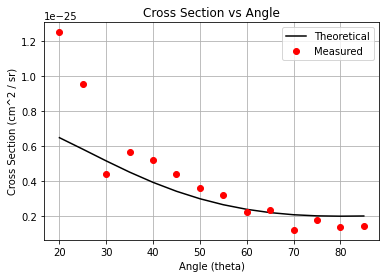

In [19]:
plt.plot(theta,crossSecTheory,'black',label='Theoretical')
plt.plot(theta,crossSecMeasured*meanRatio,'ro',label='Measured')

plt.xlabel('Angle (theta)')
plt.ylabel('Cross Section (cm^2 / sr)' )
plt.title('Cross Section vs Angle') 

plt.legend()
plt.grid(True)
plt.show()

In [20]:
np.corrcoef(crossSecTheory,crossSecMeasured)

array([[1.        , 0.93636468],
       [0.93636468, 1.        ]])

Part 3: Electron Rest Mass Determination

In [21]:
E_gamma = np.array([661.33,356,1173,1332,570,1063,122,1460,2614,1097,1294,511,1274])
T = np.array([474,205,957.3,1113.1,390.4,856.6,41,1235.6,2373.5,891.8,1077.5,337.6,1060.7])

In [22]:
def TFromFit(E_gamma,m_0):
    res = 2 * E_gamma**2 / (2 * E_gamma + m_0)
    return res

In [23]:
pars3,cov3 = curve_fit(TFromFit,E_gamma,T)
err = np.sqrt(cov3[0][0])

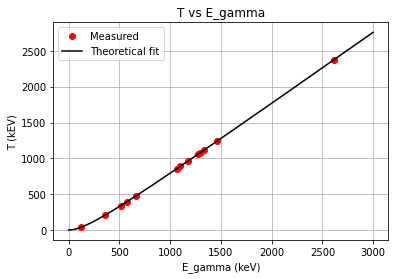

m_0c^2 = 521.5 ± 2.4 keV, 


In [24]:
x = np.arange(0,3000,1)

plt.plot(E_gamma,T,'ro',label='Measured')
plt.plot(x,TFromFit(x,pars3[0]),'black',label='Theoretical fit')

plt.xlabel('E_gamma (keV)')
plt.ylabel('T (kEV)' )
plt.title('T vs E_gamma') 

plt.legend()
plt.grid(True)
plt.show()

print('m_0c^2 = {m:.1f} ± {σm:.1f} keV, '.format(m=pars3[0],σm=err))


In [25]:
def m_nr(E_gamma,T):
    res = (2 * E_gamma - T)**2 / (2 * T)
    return res

In [26]:
pars4,cov4 = curve_fit(fitfunc,T,m_nr(E_gamma,T))

In [27]:
m4=pars4[0]
σm4=np.sqrt(cov4[0][0])
b4=pars4[1]
σb4=np.sqrt(cov4[1][1])

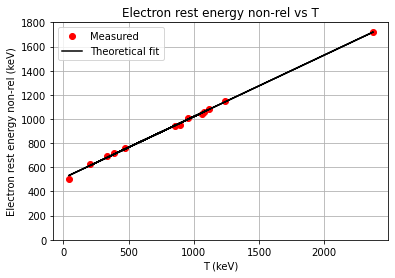

Slope = 0.509 ± 0.006, Intercept = 510.6 ± 6.2 keV


In [28]:
plt.plot(T,m_nr(E_gamma,T),'ro',label='Measured')
plt.plot(T,fitfunc(T,*pars4),'black',label='Theoretical fit')

plt.xlabel('T (keV)')
plt.ylabel('Electron rest energy non-rel (keV)' )
plt.title('Electron rest energy non-rel vs T') 

plt.ylim(0,1800)
plt.legend()
plt.grid(True)
plt.show()

print('Slope = {m:.3f} ± {σm:.3f}, Intercept = {b:.1f} ± {σb:.1f} keV'.format(m=m4,σm=σm4,b=b4,σb=σb4))

In [29]:
def m_0(E_gamma,T):
    res = (2 * E_gamma * (E_gamma - T)) / T
    return res

In [30]:
delE_gamma = 0
delT = 2

def dm_0dE_gamma(E_gamma,T):
    res = ((4 * E_gamma) / T) - 2
    return res

def dm_0dT(E_gamma,T):
    res = ((2 * E_gamma**2) / (T**2)) 
    return res

def delY(dm_0dE_gamma,dm_0dT,delE_gamma,delT):
    res = np.sqrt((dm_0dE_gamma)**2 * (delE_gamma)**2 + (dm_0dT)**2 * (delT)**2)
    
    return res

In [31]:
yerr = delY(dm_0dE_gamma(E_gamma,T),dm_0dT(E_gamma,T),delE_gamma,delT)

In [32]:
yerr


array([ 7.78645461, 12.06291493,  6.00564833,  5.72796131,  8.5268787 ,
        6.15985345, 35.41701368,  5.5848293 ,  4.851686  ,  6.05254895,
        5.76891296,  9.16424974,  5.77050351])

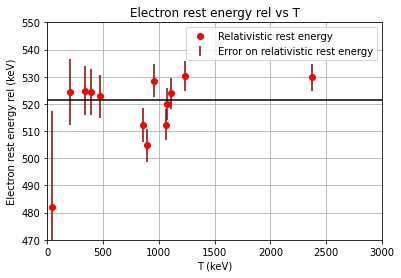

In [33]:
plt.plot(T,m_0(E_gamma,T),'ro',label='Relativistic rest energy')
plt.errorbar(T,m_0(E_gamma,T),yerr=yerr,color='darkred',ls='none',label='Error on relativistic rest energy')
plt.axhline(y = pars3[0],color = 'black')

plt.xlabel('T (keV)')
plt.ylabel('Electron rest energy rel (keV)' )
plt.title('Electron rest energy rel vs T') 

plt.xlim(0,3000)
plt.ylim(470,550)
plt.legend()
plt.grid(True)
plt.show()

Gamma vs Beta

In [34]:
beta = (T * ((2 * E_gamma) - T)) / (T**2 - (2 * E_gamma * T) + (2 * E_gamma**2))

In [35]:
def E(E_gamma,T):
    res = (T**2 - 2 * T * E_gamma + 2 * (E_gamma)**2) / T
    return res

In [36]:
gamma = E(E_gamma,T) / pars3

In [37]:
def gammaFit(c1,c2,beta):
    res = 1 / (c1 - (c2 * beta**2))**(1 / 2)
    return res

In [38]:
parsc1c2,covc1c2 = curve_fit(gammaFit,beta,gamma)

/var/folders/7n/3yfp0hr51qb73z8p5g03gv100000gp/T/ipykernel_33128/767909005.py:2: RuntimeWarning: invalid value encountered in sqrt
  res = 1 / (c1 - (c2 * beta**2))**(1 / 2)
/Users/andriishynder/Documents/GitHub/.venv/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [39]:
parsc1c2

array([1., 1.])

In [40]:
betaRange = np.arange(0,1,0.001)

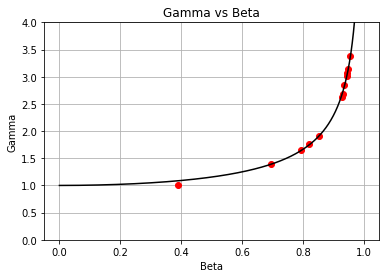

In [41]:
plt.plot(beta,gamma,'ro')
plt.plot(betaRange,gammaFit(parsc1c2[0],parsc1c2[1],betaRange),'black')



plt.xlabel('Beta')
plt.ylabel('Gamma' )
plt.title('Gamma vs Beta') 

plt.ylim(0,4)
plt.grid(True)
plt.show()

Electron momentum vs Beta

In [42]:
def pc(E_gamma,T):
    res = 2 * E_gamma - T
    return res

In [43]:
def gammaExpected(beta):
    res = 1/ (1 - beta**2)**(1/2)
    return res

In [44]:
def pcFit(beta_):
    res = gammaExpected(beta_) * beta_ * pars3
    return res

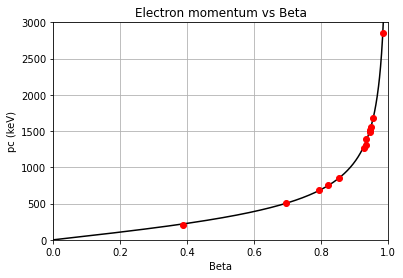

In [45]:
plt.plot(betaRange,pcFit(betaRange),'black')
plt.plot(beta,pc(E_gamma,T),'ro')

plt.xlabel('Beta')
plt.ylabel('pc (keV)' )
plt.title('Electron momentum vs Beta') 

plt.xlim(0,1)
plt.ylim(0,3000)
plt.grid(True)
plt.show()